In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
import seaborn as sns

In [3]:
from keras.datasets import mnist
mnist=mnist.load_data()

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test)=mnist

In [5]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

0

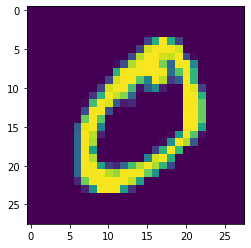

In [6]:
plt.imshow(x_train[1])
y_train[1]

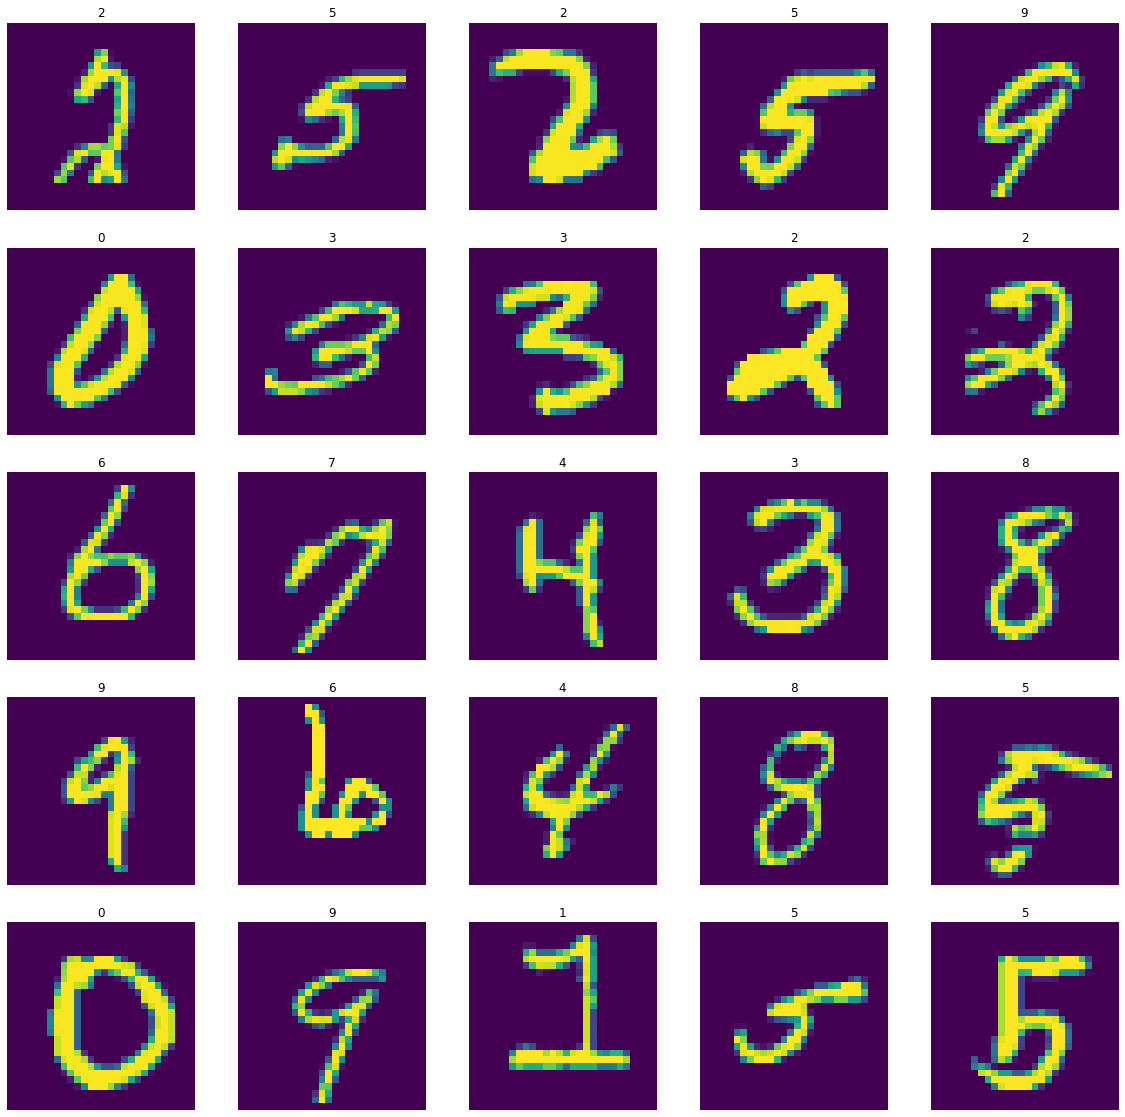

In [7]:
fig,axes=plt.subplots(5,5,figsize=(20,20))
axes=axes.ravel()
for i in range(25):
    index=np.random.randint(len(x_train))
    axes[i].imshow(x_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [9]:
x_train=x_train/255
x_test=x_test/255
x_test1=x_test

In [10]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
x_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [12]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
Inp_shape=x_train.shape[1:]
Inp_shape

(28, 28, 1)

In [15]:
y_train.shape

(60000, 10)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import tensorboard_v1

In [17]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(216,activation='relu'))
model.add(Dense(216,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train,epochs=1,batch_size=25,shuffle=True)

2400/2400 [==============================] - 211s 88ms/step - loss: 0.1698 - accuracy: 0.9468


In [20]:
evaluation=model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 30ms/step - loss: 0.0408 - accuracy: 0.9867


In [21]:
print("accuracy:{}".format(evaluation[1]))

accuracy:0.9866999983787537


In [22]:
pred=model.predict_classes(x_test,batch_size=25)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [47]:
y_test=y_test.argmax(1)

In [51]:
# fig,axes=plt.subplots(5,5,figsize=(20,20))
# axes=axes.ravel()
# # x_test=x_test.reshape(28,28)
# for i in range(25):
#     index=np.random.randint(len(y_test))
#     axes[i].imshow(x_test[index])
#     axes[i].set_title("predicted:{} \n Actual:{}".format(pred[index],x_test[index]))
#     axes[i].axis("off")

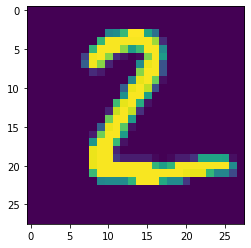

In [27]:
plt.imshow(x_test[1].reshape(28,28))

(-0.5, 27.5, 27.5, -0.5)

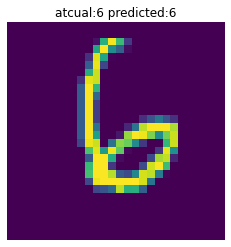

In [55]:
r=np.random.randint(len(y_test))
plt.imshow(x_test[r].reshape(28,28))
plt.title("atcual:{} predicted:{}".format(y_test[r],pred[r]))
plt.axis("off")

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,pred)
cm

array([[ 972,    0,    1,    0,    0,    0,    4,    1,    1,    1],
       [   0, 1132,    0,    0,    0,    1,    1,    0,    1,    0],
       [   1,    2, 1016,    2,    0,    0,    1,    7,    3,    0],
       [   0,    0,    1,  990,    0,   13,    0,    1,    4,    1],
       [   1,    1,    1,    0,  967,    0,    6,    1,    1,    4],
       [   2,    0,    0,    3,    0,  881,    3,    1,    2,    0],
       [   3,    2,    0,    0,    1,    1,  950,    0,    1,    0],
       [   0,    6,    6,    0,    0,    0,    0, 1012,    0,    4],
       [   2,    0,    2,    1,    1,    0,    2,    1,  962,    3],
       [   1,    2,    0,    0,    8,    2,    1,    7,    3,  985]],
      dtype=int64)

In [65]:
accuracy_score(y_test,pred)

0.9867

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



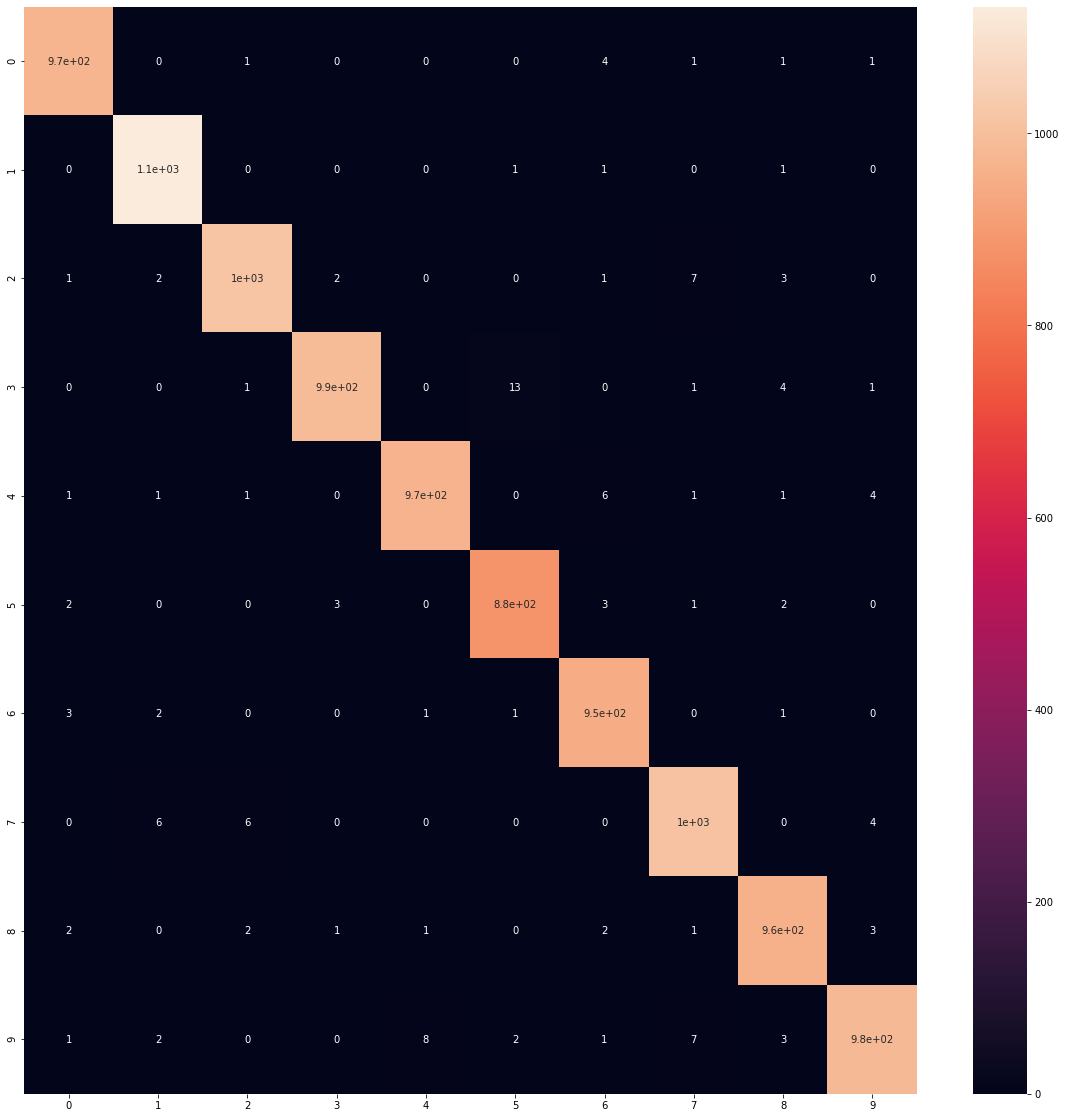

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)